План

1. Препроцессинг наверх  [10 min] [1П]
 
2. Сделать оглавление    [20 min] [3П]

3. Написать итоги, выводы, описать алгоритмы [25 min] [1Д]

4. Форматирование граффиков  [7 min] [2П]

 ### Источник датасета
https://www.kaggle.com/snap/amazon-fine-food-reviews


### Описание датасета 
Датасет состоит из обзоров продуктов питания от Amazon. Данные охватывают период более 10 лет, включая все \~ 500 000 обзоров до октября 2012 года. Обзоры включают в себя информацию о продуктах и пользователях, рейтинги и комментарии к товарам. Датасет также включает в себя отзывы о всех других категорий Amazon.

### Данные включают
- Отзывы с октября 1999 до октября 2012
- 568,454 отзывов
- 256,059 пользователи
- 74,258 товаров
- 260 пользователей с 50 отзывами и более
   

### Данные колонок 
- Id - уникальный идентификатор
- ProductId - уникальный идентификатор каждого продукта
- UserId - уникальный идентификатор каждого пользователя
- ProfileName - логин профиля
- HelpfulnessNumerator - количество пользователей, которые посчитали этот отзыв полезным
- HelpfulnessDenominator - количество пользователей, которые отреагировали на этот отзыв
- Score - рейтинг от 1 до 5 (1 - худшее, 5 - лучшее)
- Time -  временная отметка
- Summary - основные выводы отзыва
- Text - весь текст отзыва


    Оглавление
    1. Визуализация
    2. 

### Загружаем библиотеки

In [456]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline 

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string

data_folder = "../amazon-fine-food-reviews/Reviews.csv"

## Смотрим на данные

In [3]:
df = pd.read_csv(data_folder)
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Статистика по датасету, информация по колонкам

In [4]:
df.shape

(568454, 10)

In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## Частотное распределение оценок товаров

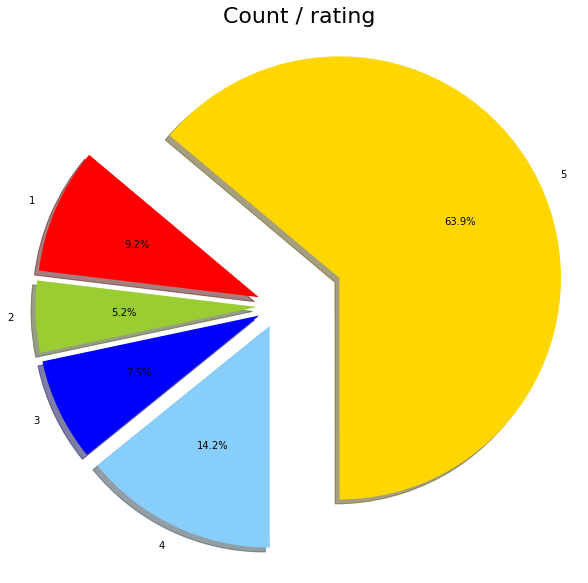

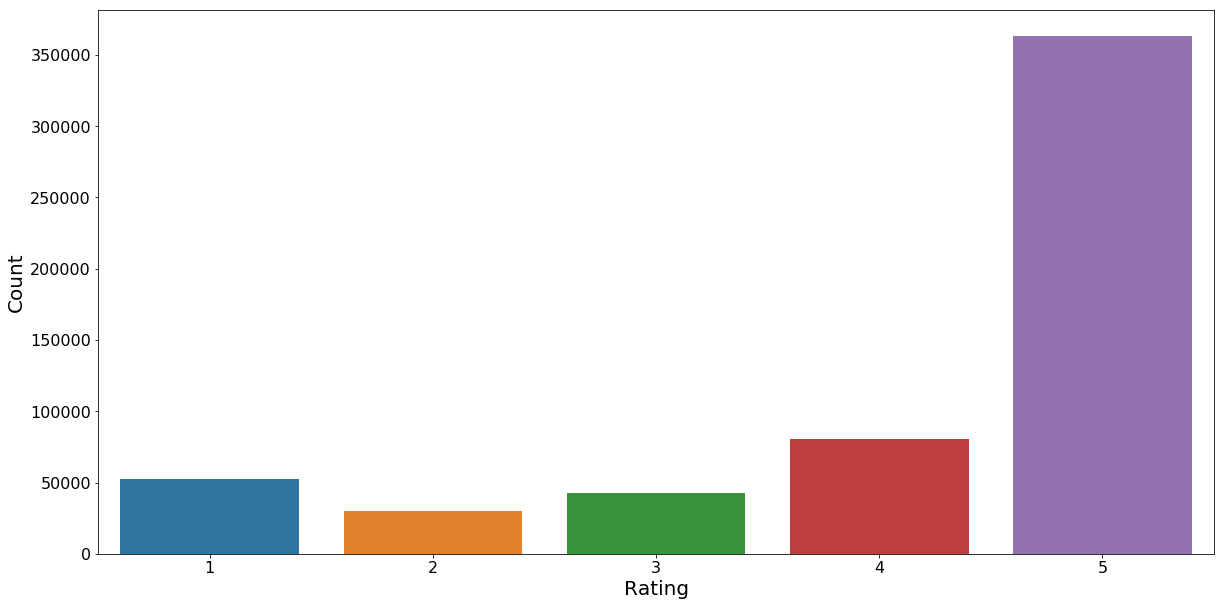

In [462]:
# Data to plot
plt.figure(figsize = (10, 10))
plt.title('Count / rating', fontsize = 22)
labels = list(range(1,6))
dct = dict(df['Score'].value_counts())
sizes  = [dct[k]/sum(list(dct.values())) for k in labels]
colors = ['red', 'yellowgreen', 'blue', 'lightskyblue', 'gold']
explode = (0.1, 0.1, 0.1, 0.1, 0.3)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

plt.figure(figsize = (20, 10))
sns.countplot(x='Score', data=df)
plt.ylabel('Count', fontsize = 20)
plt.xlabel('Rating', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()




## Анализ положительных и негативных оценок

In [463]:
new_DF = df[['UserId','HelpfulnessNumerator','HelpfulnessDenominator', 'Summary', 'Text','Score']].copy()

new_DF["Sentiment"] = new_DF["Score"].apply(lambda score: "positive" if score > 3 else \
                                              ("negative" if score < 3 else "not defined"))

new_DF.loc[new_DF.HelpfulnessDenominator == 0, 'Usefulness'] = ["useless"]
new_DF.shape

(568454, 8)

<p id = "pidr"> </p>

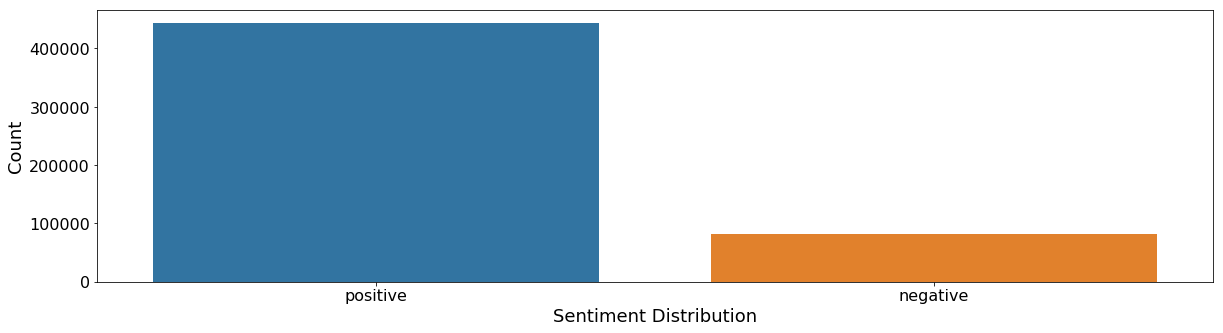

positive       443777
negative        82037
not defined     42640
Name: Sentiment, dtype: int64

In [470]:
plt.figure(figsize = (20, 5))

sns.countplot(x='Sentiment', order=["positive", "negative"], data=new_DF)
plt.xlabel('Sentiment Distribution', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()
new_DF.Sentiment.value_counts()

## Посмотрим самые часто употребляемые слова в положительных и отрицательных отзывах

In [490]:
def plot_Cloud(wordCloud, title = ''):
    plt.figure( figsize=(20,10))
    plt.title(title, fontsize = 30)
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

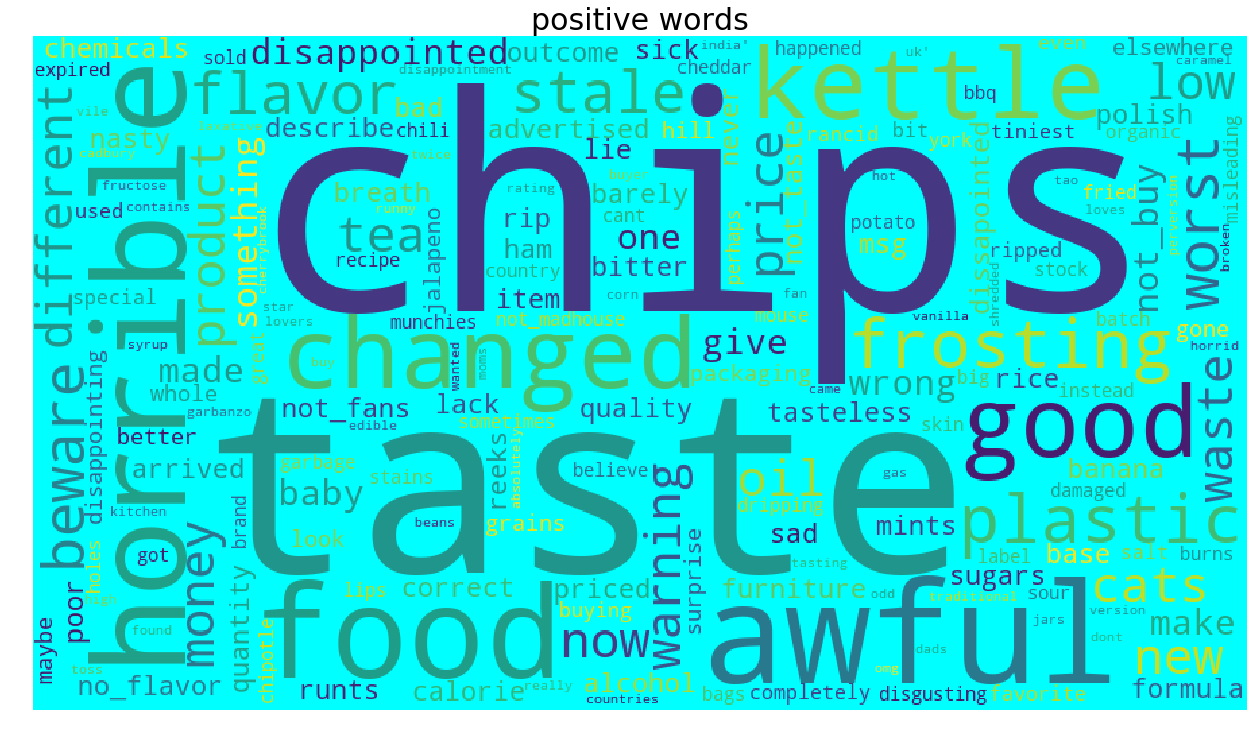

In [513]:
def foo(text, fast = True):
    text = str(text).lower()
    text = text.replace(' no ', ' no_').replace(' not ',' not_')
    if fast:
        return text
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

text_pos = ' '.join(df[df['Score'] == 5]['Summary'][:100].apply(foo))
wc_pos = WordCloud(width=900, height=500, background_color="cyan").generate(text_neg)
                    
plot_Cloud(wc_pos, title = 'positive words')

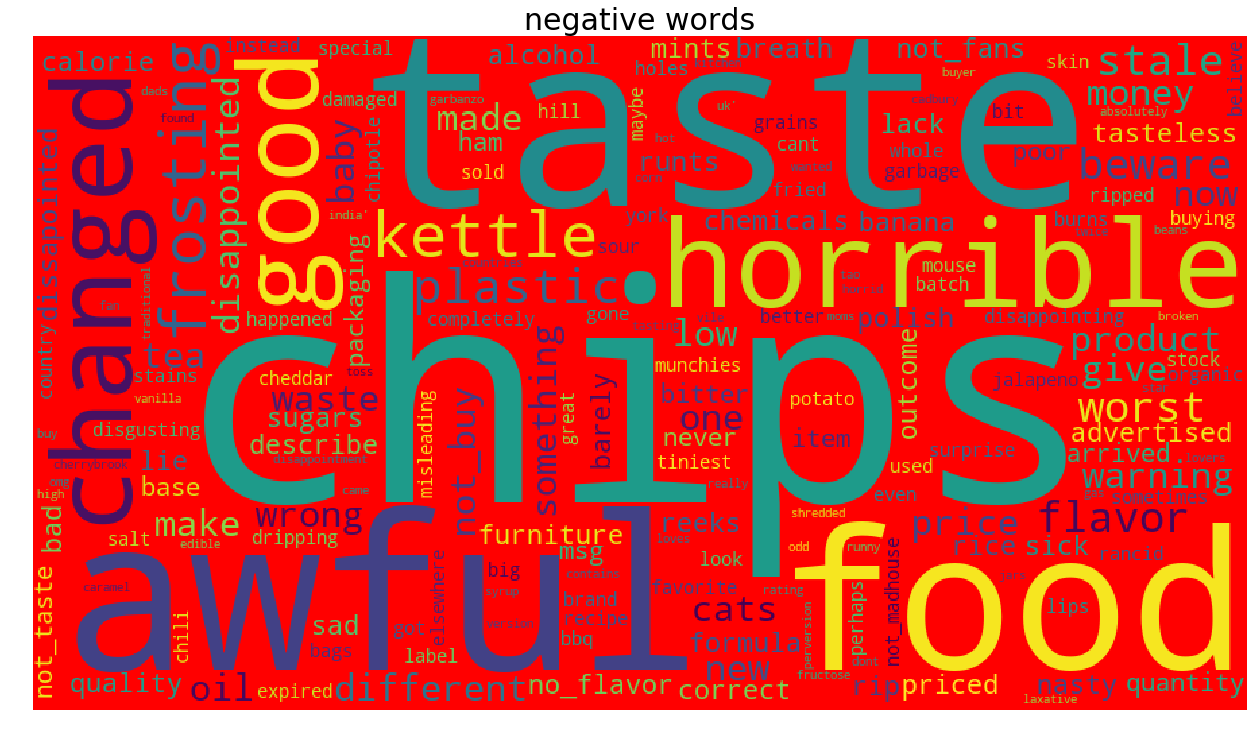

In [512]:
text_neg = ' '.join(df[df['Score'] == 1]['Summary'][:100].apply(foo))
wc_neg = WordCloud(width=900, height=500, background_color="red").generate(text_neg)
plot_Cloud(wc_neg, title = 'negative words')

## Анализ полезных и бесполезных отзывов

In [527]:
# df.head()

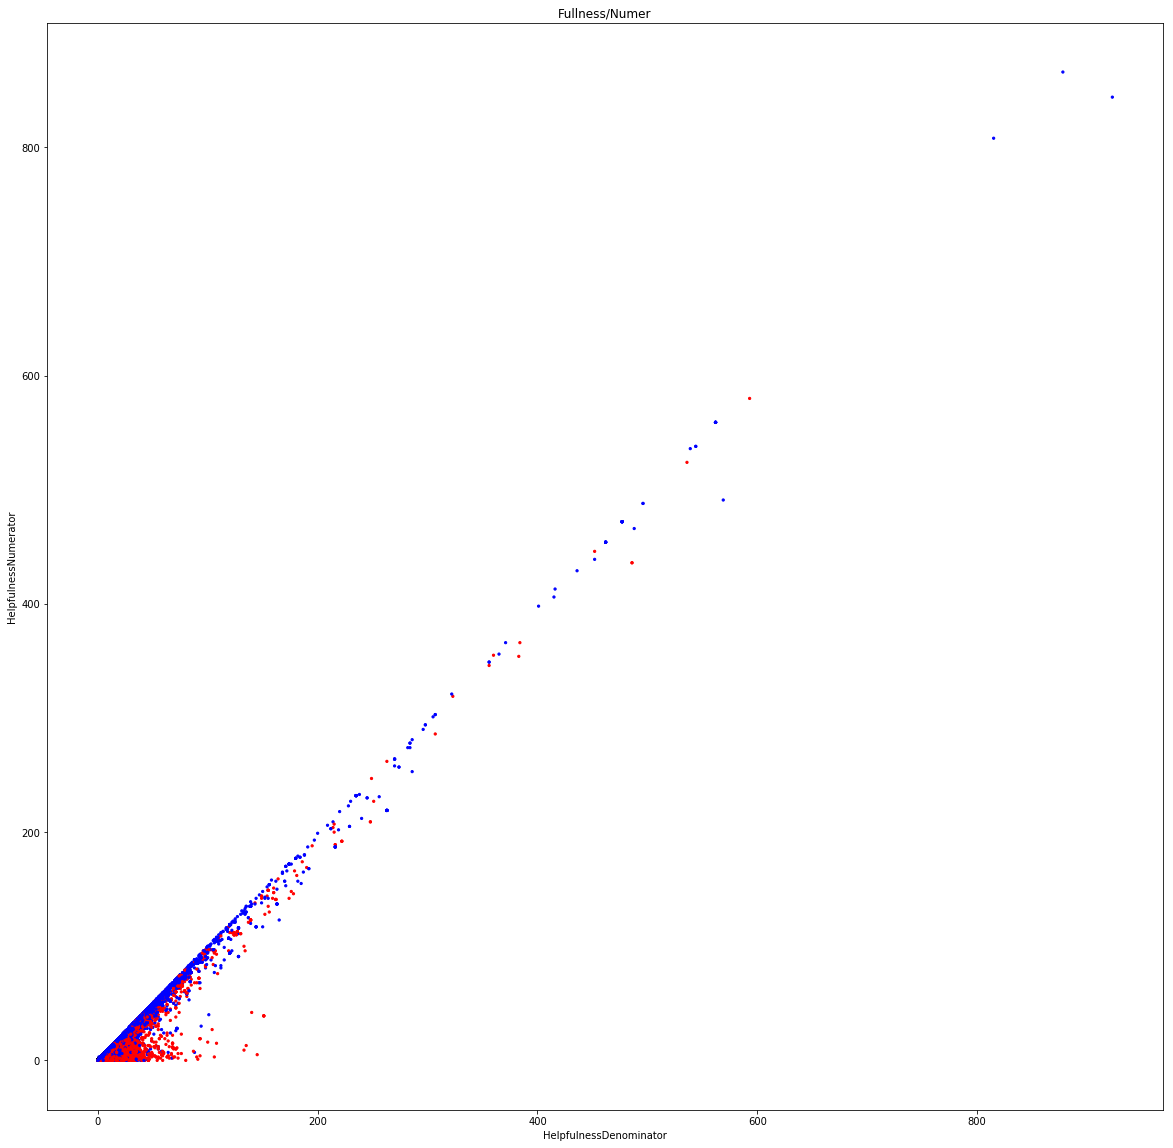

In [528]:
def get_color(s):
    if s < 2.5:
        return 'red'
    else:
        return 'blue'

plt.figure(figsize = (20, 20))
plt.title('Fullness/Numer')
plt.scatter(df['HelpfulnessDenominator'], df['HelpfulnessNumerator'], color = df['Score'].apply(get_color), s = 5)
plt.ylabel('HelpfulnessNumerator')

plt.xlabel('HelpfulnessDenominator')
plt.show()

In [516]:
new_DF["Usefulness"] = (new_DF["HelpfulnessNumerator"]/new_DF["HelpfulnessDenominator"]).apply\
(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and\
                                                                        n <= 0.75 else "useless")))

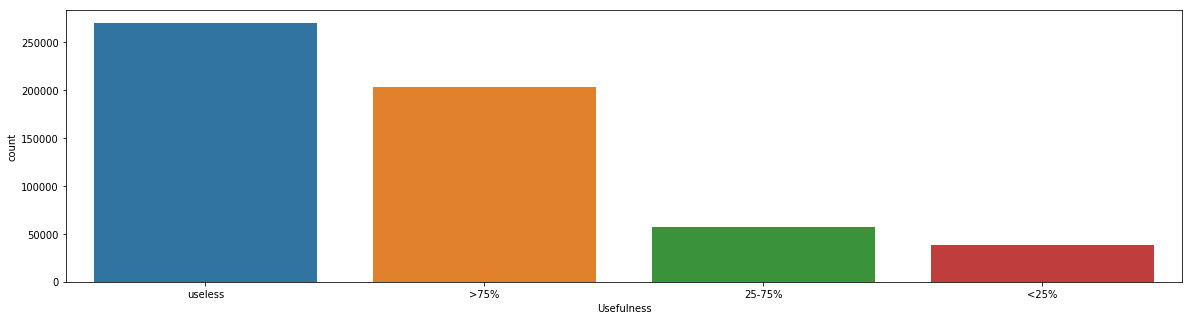

In [517]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=new_DF)
plt.xlabel('Usefulness')
plt.show()

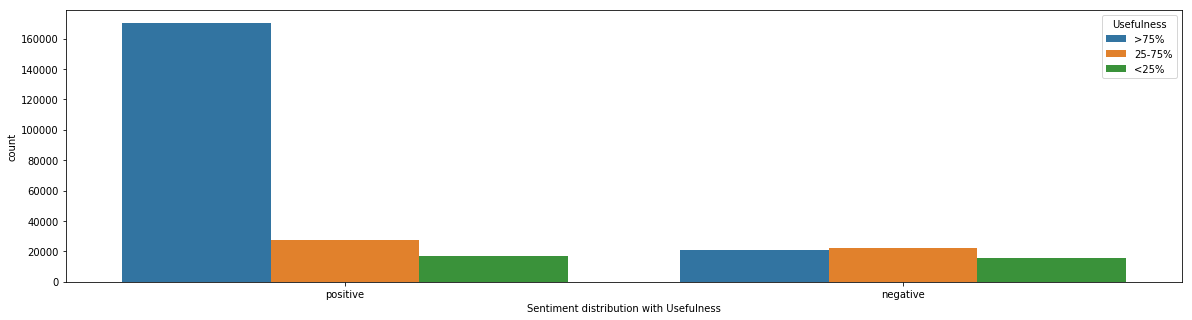

In [518]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=new_DF)
plt.xlabel('Sentiment distribution with Usefulness')
plt.show()

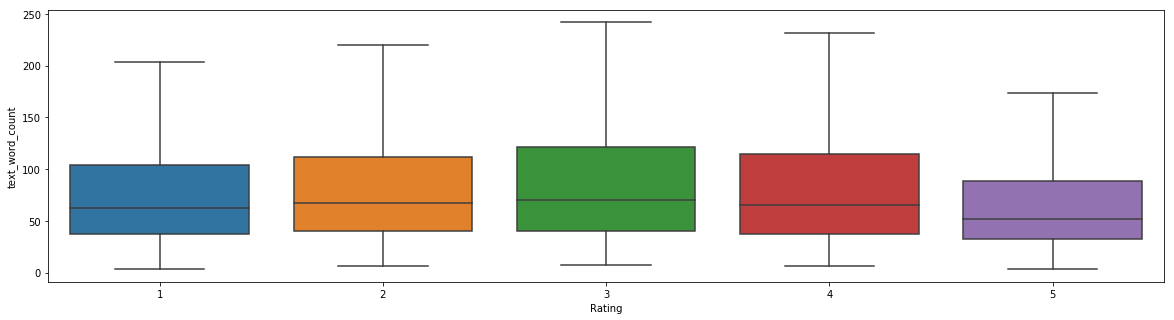

In [519]:
plt.figure(figsize = (20, 5))
new_DF["text_word_count"] = new_DF["Text"].apply(lambda text: len(text.split()))
sns.boxplot(x='Score',y='text_word_count', data=new_DF, showfliers=False)
plt.xlabel('Rating')
plt.show()

In [520]:
# new_DF["text_word_count"] = new_DF["Text"].apply(lambda text: len(text.split()))
# sns.violinplot(x='Score',y='text_word_count', data=new_DF, showfliers=False)
# plt.xscale('log')
# plt.xlabel('Rating')
# plt.show()

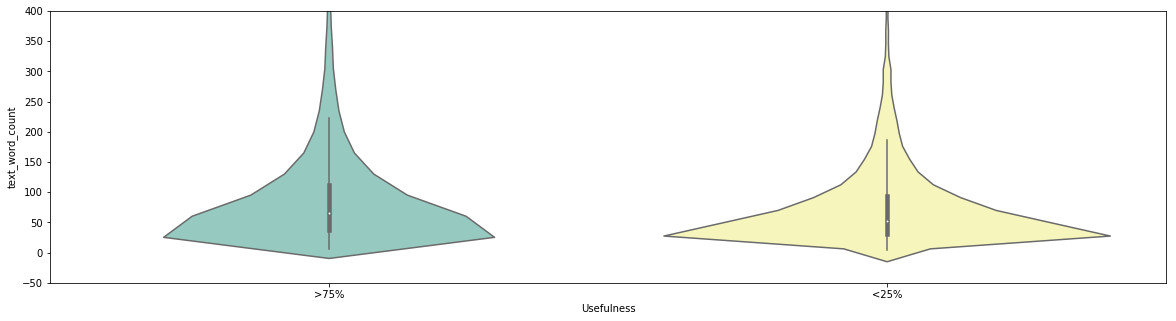

In [521]:
plt.figure(figsize = (20, 5))

sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=new_DF, palette='Set3')
plt.ylim(-50, 400)
plt.show()

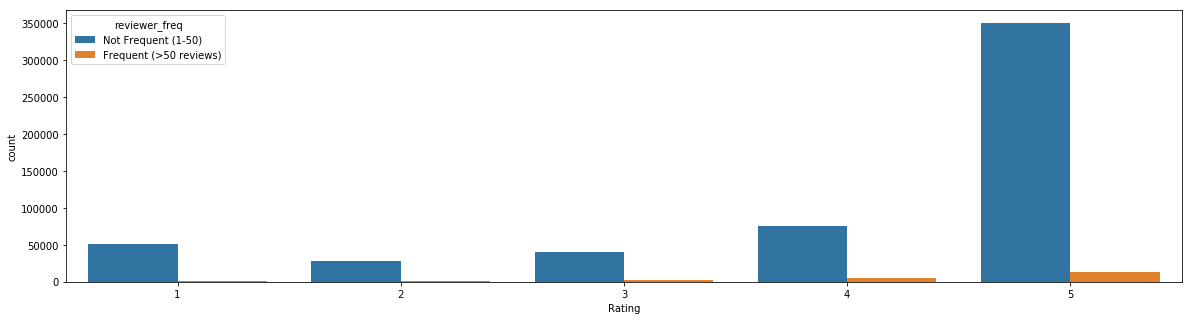

In [522]:
plt.figure(figsize = (20, 5))

x = new_DF.UserId.value_counts()
x.to_dict()
new_DF["reviewer_freq"] = new_DF["UserId"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")
ax = sns.countplot(x='Score', hue='reviewer_freq', data=new_DF)
ax.set_xlabel('Rating')
plt.show()

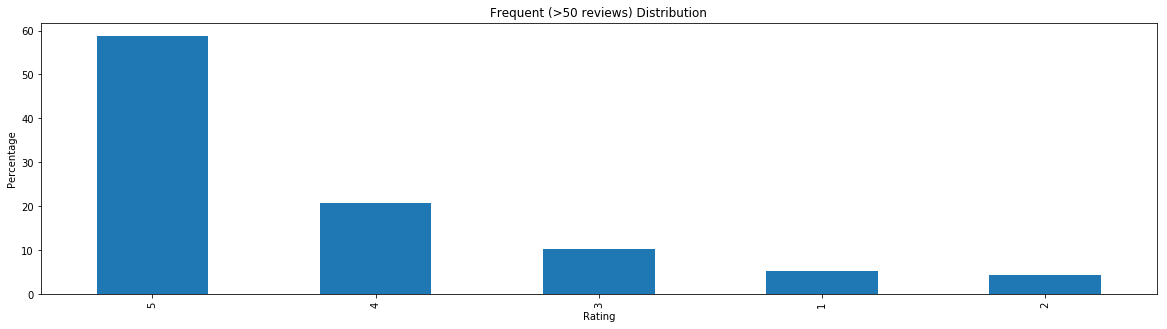

In [523]:
plt.figure(figsize = (20, 5))

y = new_DF[new_DF.reviewer_freq=="Frequent (>50 reviews)"].Score.value_counts()
z = new_DF[new_DF.reviewer_freq=="Not Frequent (1-50)"].Score.value_counts()

tot_y = y.sum()

y = (y/tot_y)*100

tot_z = z.sum()

z = (z/tot_z)*100

y.plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Percentage")
plt.title("Frequent (>50 reviews) Distribution")
plt.show()

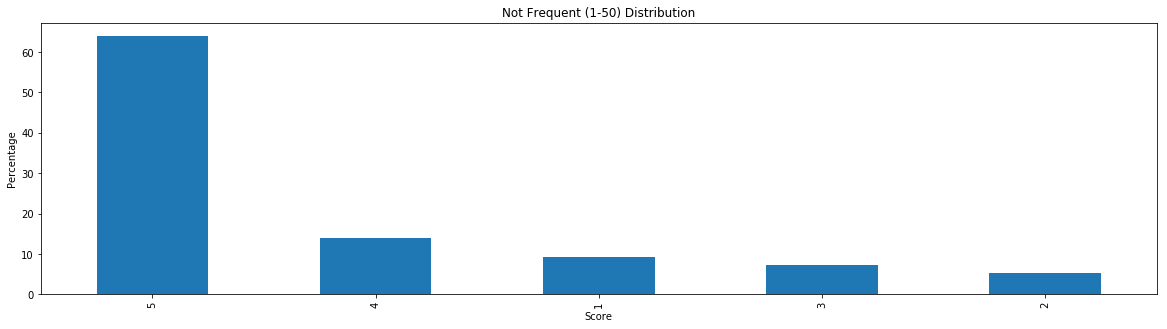

In [524]:
plt.figure(figsize = (20, 5))

z.plot(kind="bar")
plt.xlabel("Score")
plt.ylabel("Percentage")
plt.title("Not Frequent (1-50) Distribution")
plt.show()

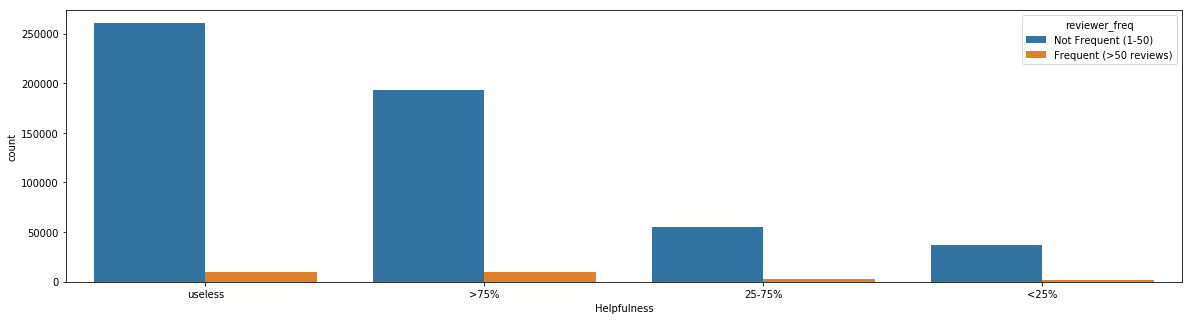

In [525]:
plt.figure(figsize = (20, 5))


sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewer_freq', data=new_DF)
plt.xlabel('Helpfulness')
plt.show()

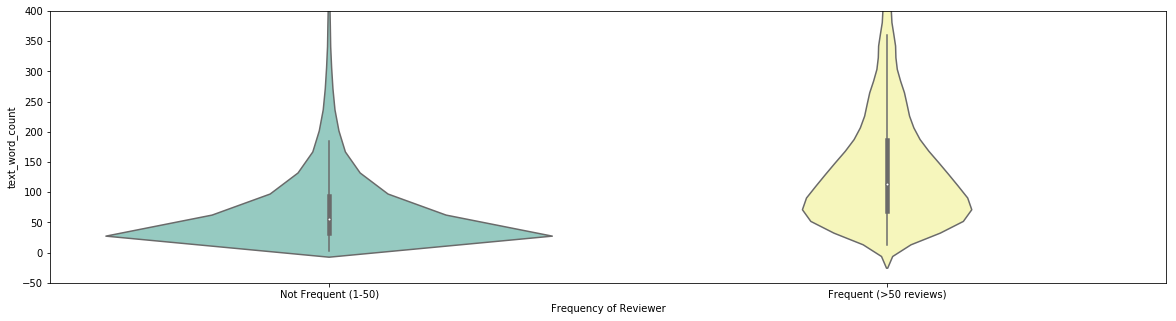

In [526]:
plt.figure(figsize = (20, 5))


sns.violinplot(x='reviewer_freq', y='text_word_count',  \
               data=new_DF, palette='Set3')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()

### Выводы после краткого анализа данных 

1 Много пропущенных значений в колонках "Summary" and "ProfileName"

2 Распределение классов несбалансированно (отзывов с рейтингом 4/5 порядка 75%)

3 Чаще всего положительные отзывы 
    - короче
    - их находят более полезными
    
4 Рецензенты с частыми отзывами
    - пишут отзывы длиннее
    - их отзывы считаются более полезными

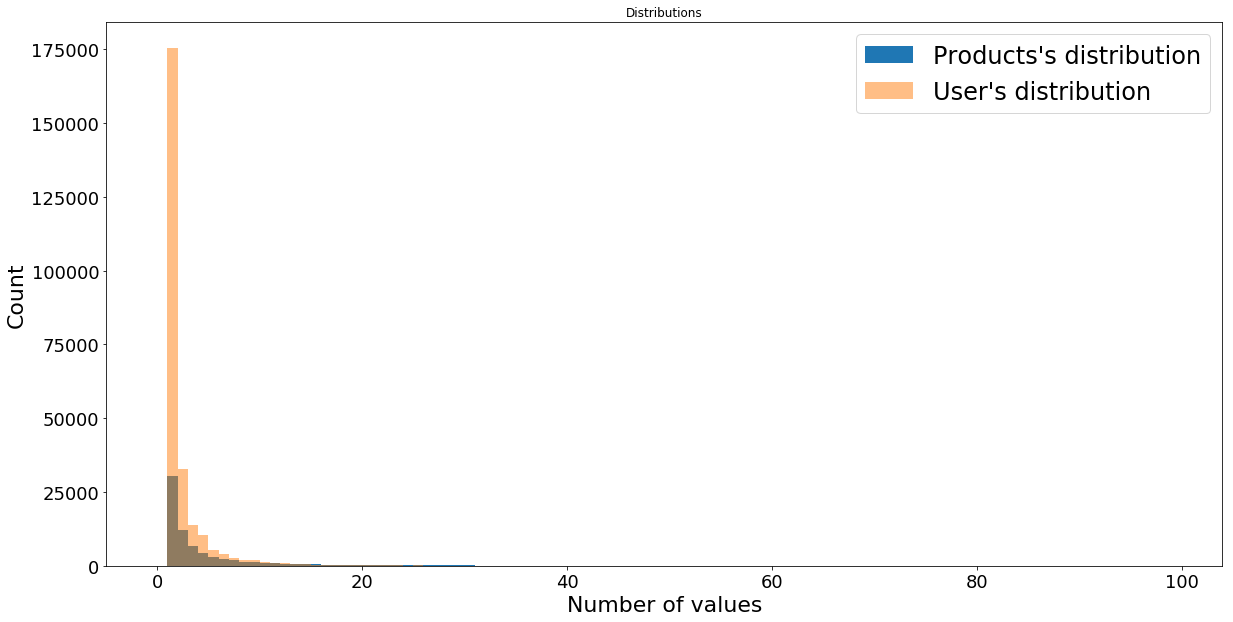

In [541]:
plt.figure(figsize = (20, 10))
plt.title('Distributions')
plt.hist(list(dict(df['ProductId'].value_counts()).values()), bins = range(100), 
         label = "Products's distribution")

plt.hist(list(dict(df['UserId'].value_counts()).values()), bins = range(100), alpha = 0.5, 
         label = "User's distribution")


plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

plt.ylabel('Count', fontsize = 22)
plt.xlabel('Number of values', fontsize = 22)

plt.legend(fontsize = 24)
plt.show()

In [542]:
# plt.figure(figsize = (20, 10))
# plt.title('Distributions')
# plt.hist(list(dict(df['ProductId'].value_counts()).values()), bins = range(100), 
#          label = "Products's distribution")

# plt.hist(list(dict(df['UserId'].value_counts()).values()), bins = range(100), alpha = 0.5, 
#          label = "User's distribution")


# plt.xticks(fontsize = 18)
# plt.yticks(fontsize = 18)

# plt.ylabel('Count', fontsize = 22)
# plt.xlabel('Number of values', fontsize = 22)

# plt.legend(fontsize = 24)
# plt.show()

### Подготовим данные для построения рекомендаций

Уберем все товары и пользователей менее чем с 8 записями

In [21]:
# df = pd.read_csv('Reviews.csv')
M = 8

In [80]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [90]:
def data_clean(df, feature, m):
    count = df[feature].value_counts()
    df = df[df[feature].isin(count[count > m].index)]
    return df

In [91]:
# features[0]

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

df['datetime'] = pd.to_datetime(df.Time, unit='s')

features = ['ProductId', 'UserId']
m = 8
#Пользователей и предметы с менее чем 8 оценками не берем
def data_raw(df, features, m):
    print(df.shape)
    fil = df.ProductId.value_counts()
    fil2 = df.UserId.value_counts()
    df['#Proudcts'] = df.ProductId.apply(lambda x: fil[x])
    df['#Users'] = df.UserId.apply(lambda x: fil2[x])
    while (df.ProductId.value_counts(ascending=True)[0]) < m \
        or (df.UserId.value_counts(ascending=True)[0] < m):
        print(df.shape)
        df = data_clean(df, features[0], m)
        df = data_clean(df, features[1], m)
    return df
        
raw_data = data_raw(df, features, m)
raw_data['uid'] = pd.factorize(raw_data['UserId'])[0]
raw_data['pid'] = pd.factorize(raw_data['ProductId'])[0]

(568454, 11)
(568454, 13)
(124413, 13)
(93782, 13)
(90097, 13)


In [126]:
pd.factorize([1,2,2,2,2, 3])

(array([0, 1, 1, 1, 1, 2]), array([1, 2, 3]))

<h4> У нас осталось 90000 объектов (15.8% от исходной выборки) </h4>

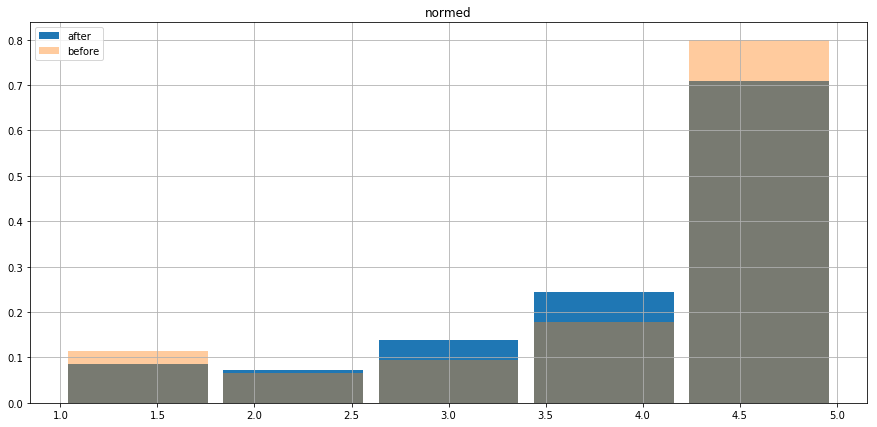

In [122]:
plt.figure(figsize = (15, 7))
plt.title('normed')
raw_data['Score'].hist(bins = 5, rwidth = 0.9, normed = True, label = 'after')
df['Score'].hist(bins = 5, rwidth = 0.9,alpha = 0.4, normed = True, label = 'before')
# plt.hist()
# plt.xticks([1,2,3,4,5])
plt.legend()
plt.show()

In [124]:
raw_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,datetime,#Proudcts,#Users,uid,pid,time,nuser,nproduct
422,423,B000G6RYNE,A2NO1TXXS9T0EE,BruteNStones,0,0,4,1335398400,Hard,"Great if you are cutting back on fat, they do ...",2012-04-26,217,44,0,0,0.955333,0.079727,0.230088
423,424,B000G6RYNE,A1IRN1M05TPOVT,"Sharon M. Helfand ""Scrapper""",0,0,5,1334620800,Kettle potato chips: Fully loaded baked potato,I have never met a Kettle brand chip I did not...,2012-04-17,217,49,1,0,0.953136,0.091116,0.230088
424,425,B000G6RYNE,ARONI7W0W677H,Peter N,0,0,5,1334275200,"Fresh, Lightly-Spiced, Crunchy Kettle Chips. G...",After buying bags one at a time (at a hefty ma...,2012-04-13,217,16,2,0,0.952160,0.015945,0.230088
425,426,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,glad to find them in 1 oz size,"I buy mostly for vending, so the size of the b...",2012-04-10,217,32,3,0,0.951428,0.052392,0.230088
426,427,B000G6RYNE,A1Y3XPZK9ZADFW,albinocrow,0,0,4,1334016000,"pretty good, could be better",Glad to find these in a one ounce size but the...,2012-04-10,217,32,3,0,0.951428,0.052392,0.230088


In [ ]:
#Введем шкалирование признаков
sc = MinMaxScaler()
raw_data['time'] = sc.fit_transform(raw_data['Time'].values.reshape(-1,1))
raw_data['nuser'] = sc.fit_transform(raw_data['#Users'].values.reshape(-1,1))
raw_data['nproduct'] = sc.fit_transform(raw_data['#Proudcts'].values.reshape(-1,1))

In [267]:
from sklearn.model_selection import train_test_split

ind_train, ind_test, _, _ = train_test_split(raw_data.index, raw_data, test_size=0.3)

raw_data['OOS'] = False
raw_data.loc[ind_test.tolist(), 'OOS'] = True

(1489, 6063, 1489, 6063)

In [262]:
raw_data['uniq_id'] = [str(k)+'|'+str(v) for k,v in raw_data[['uid', 'pid']].get_values()]
raw_data = raw_data.sort_values(['uniq_id', 'Score']).drop_duplicates(subset=['uniq_id'], keep='last')
del raw_data['uniq_id']

In [383]:
data = raw_data.copy()
X_train = data[data['OOS'] == False]
X_test = data[data['OOS']  == True]

total_p, total_u = data['pid'].unique().shape[0], data['uid'].unique().shape[0]

def create_table_from_dataframe(df):
    res = np.zeros([total_u,total_p])
    for u, p, s in df[['uid', 'pid', 'Score']].get_values():
        res[u][p] = s
    return res


In [384]:
# table.shape

In [318]:
# y_dct_all = {(uid, pid) : score  for uid, pid, score in raw_data[['uid', 'pid', 'Score']].get_values()}
# y_dct_train = {(uid, pid) : score  for uid, pid, score in raw_data[raw_data['OOS'] == False][['uid', 'pid', 'Score']].get_values()}
# y_dct_test = {(uid, pid) : score  for uid, pid, score in raw_data[raw_data['OOS'] == True][['uid', 'pid', 'Score']].get_values()}




In [319]:
# raw_data['OOS'].mean()

In [320]:
# #Введем шкалирование признаков
# sc = MinMaxScaler()
# raw_data['time'] = sc.fit_transform(raw_data['Time'].values.reshape(-1,1))
# raw_data['nuser'] = sc.fit_transform(raw_data['#Users'].values.reshape(-1,1))
# raw_data['nproduct'] = sc.fit_transform(raw_data['#Proudcts'].values.reshape(-1,1))

# #Разделим данные на 3 группы
# X1 = raw_data.loc[:,['uid','pid']]
# X2 = raw_data.loc[:,['uid','pid','time']]
# X3 = raw_data.loc[:,['uid','pid','time','nuser','nproduct']]
# y = raw_data.Score

# #Заранее сделаем train_test_split
# X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
# X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
# X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=42)

# #Общие train и test
# #User, product, score in line
# train = np.array(X1_train.join(y_train))
# test = np.array(X1_test.join(y_test))

# #productId -> pid index
# pid2PID = raw_data.ProductId.unique()
# data_mixed = X1.join(y)
# total_p = data_mixed['pid'].unique().shape[0]
# total_u = data_mixed['uid'].unique().shape[0]

# # Сделаем user-item таблицу
# table = np.zeros([total_u,total_p])
# z = np.array(data_mixed)
# for line in z:
#     u,p,s = line
#     # Если значений несколько - берем максимальное
#     if table[u][p] < s:
#         table[u][p] = s

# # table1 = np.zeros((total_u,total_p))
# # for p, u, s in data_mixed.get_values():
# #     table1[p][u] = s

In [209]:
# list(sorted(Counter([str(line[0])+'|' + str(line[1]) 
#                      for line in data_mixed[['uid', 'pid']].get_values()]).items(), 
#       key = lambda x:-x[1]))[:10]


In [210]:
df.shape

(568454, 13)

In [211]:
raw_data.shape

(89282, 18)

### Метрики качества

Выбор был сделан в пользу MSE - средняя квадратичная ошибка.

In [212]:
# test

In [213]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def caculate_mse(x):
    MSE1 = []
    MSE2 = []
    for line in train:
        #User, product, score in line
        u,p,s = line 
        MSE1.append(s)
        MSE2.append(x[u,p])
    MSE_in_sample = mean_squared_error(MSE1, MSE2)
    MSE3 = []
    MSE4 = []
    for line in test:
        u,p,s = line
        MSE3.append(s)
        MSE4.append(x[u,p])
        
    MSE_out_sample = mean_squared_error(MSE3, MSE4)
    print('The train sample MSE = ' + str(MSE_in_sample))
    print('The test sample MSE = ' + str(MSE_out_sample))
    return MSE_in_sample, MSE_out_sample

def calculate_metric(dct):
    """
    dct format {(uid, pid) : score}
    """
    t = [] 
    for (uid, pid), score in dct.items():
        t.append(score)

Confusion matrix

<img src="cm.png">

In [214]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def draw_cm(y_pred, y_test = test, title=''):
    y1 = []
    y2 = []
    for line in y_test:
        u,p,s = line
        y1.append(s)
        y2.append(y_pred[u,p])
    temp1 = []
    temp2 = []
    for i in range(len(y1)):
        if np.array(y1)[i] >= 4:
            temp1.append(1)
        elif np.array(y1)[i] <= 2:
            temp1.append(0)
        else:
            temp1.append(0)
        if y2[i] >= 4:
            temp2.append(1)
        elif y2[i] <= 2:
            temp2.append(0)
        else:
            temp2.append(0)
    cm = confusion_matrix(temp1, temp2)
    plt.figure()
    plot_confusion_matrix(cm, classes=['not','recommand'], normalize=True,
                          title=title)
    plt.show()

In [415]:
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
# results_final = {}
def print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = None):
    """
        y_train, t_train, t_test, t_train - list of metrics
        
    """
    def foo(x):
        return str(max(min(int(x), 5), 1))
    
    temp = np.mean(y_train) 
    trainMSE = mean_squared_error(y_train,[temp for i in y_train])
                                  
    temp = np.mean(y_test) 
    testMSE = mean_squared_error(y_test,[temp for i in y_test])

    print("Train")
    print('\tMSE(mean)        %2.4F'%trainMSE)
    print('\tMSE(prediction)  %2.4F'%mean_squared_error(y_train,t_train))
    print('\tR2(prediction)    %2.4F'%r2_score(y_train,t_train))
    
    
    if not binary:
        print('\tconfusion matrix')
        M = confusion_matrix([foo(i) for i in y_train], [foo(i) for i in t_train])
        print(str(M).replace('\n', '\t\n'))
        plot_confusion_matrix(M, classes=['1', '2', '3', '4', '5'], normalize=True, title='binary')
        plt.show()
    else:   
        print('\tconfusion matrix false')
        M = confusion_matrix([i>3 for i in y_train], [i>3 for i in t_train])
        plot_confusion_matrix(M, classes=['not','recommand'], normalize=True, title='binary')
        print(str(M).replace('\n', '\t\n'))
        plt.show()
    
    print("\nTest")
    print('\tMSE(mean)        %2.4F'%testMSE)
    print('\tMSE(prediction)  %2.4F'%mean_squared_error(y_test,t_test))
    print('\tR2(prediction)    %2.4F'%r2_score(y_test,t_test))
    
    
    if not binary:
        print('\tconfusion matrix')
        M = confusion_matrix([foo(i) for i in y_test], [foo(i) for i in t_test])
        print(str(M).replace('\n', '\t\n'))
        plot_confusion_matrix(M, classes=['1', '2', '3', '4', '5'], normalize=True, title='binary')
        plt.show()
    else:   
        print('\tconfusion matrix false')
        M = confusion_matrix([i>3 for i in y_test], [i>3 for i in t_test])
        plot_confusion_matrix(M, classes=['not','recommand'], normalize=True, title='binary')
        print(str(M).replace('\n', '\t\n'))
        plt.show()

    if name is not None:
        results_final[name] = {'r2(train)' : r2_score(y_train,t_train),
                               'r2(test)'  : r2_score(y_test,t_test)
                              }

#### Предсказание

In [353]:
def rec(result, uid, n, rawId= False):
    if uid in range(total_u):
        top_N = np.argpartition(result[uid],-n)[-n:]
        print('the top{} recommanded products for user {} is {}'.format(n,uid,top_N))
        if rawId == True:
            print('the real ID is {}'.format(pid2PID[top_N]))
    else:
        print('this user has not bought anything, plz use other methods')
    return top_N

Сначала мы попытаемся использовать rfr для построения простой модели. Идея очень проста, просто используем алгоритм поиска скрытой оценки одной пары пользователя и товара. Мы можем видеть, что MSE не очень большое, и confusion matrix является вполне допустимой.
<img src="rf.jpg">
В этой части, X - закодированные UserId и ProductId.Также добавлены MinMaxScaler времени, количества товаров и пользователей. y - выставленная оценка (score).

Но недостаток очень очевиден: на отложенной выборке MSE равен 0.32, а на обучающей -- 0.07, что говорит о переобучении.

## Random Forest Regressor

Train
	MSE(mean)        1.4924
	MSE(prediction)  0.1120
	R2(prediction)    0.9250
	confusion matrix
[[ 3371   424    62     2     0]	
 [  102  3009   378     8     0]	
 [    1   671  5678   166     0]	
 [    0    45  3072  8367     0]	
 [    0    14   418  9706 22957]]
Normalized confusion matrix
[[8.74e-01 1.10e-01 1.61e-02 5.18e-04 0.00e+00]
 [2.92e-02 8.60e-01 1.08e-01 2.29e-03 0.00e+00]
 [1.53e-04 1.03e-01 8.71e-01 2.55e-02 0.00e+00]
 [0.00e+00 3.92e-03 2.68e-01 7.29e-01 0.00e+00]
 [0.00e+00 4.23e-04 1.26e-02 2.93e-01 6.94e-01]]


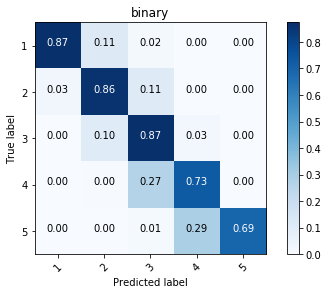


Test
	MSE(mean)        1.4543
	MSE(prediction)  0.6416
	R2(prediction)    0.5588
	confusion matrix
[[1105  141  155  141   34]	
 [  58  709  323  309   33]	
 [  21  305 1614  802   62]	
 [  18  257 1418 3076  136]	
 [  47  249 1200 4543 8295]]
Normalized confusion matrix
[[0.7  0.09 0.1  0.09 0.02]
 [0.04 0.5  0.23 0.22 0.02]
 [0.01 0.11 0.58 0.29 0.02]
 [0.   0.05 0.29 0.63 0.03]
 [0.   0.02 0.08 0.32 0.58]]


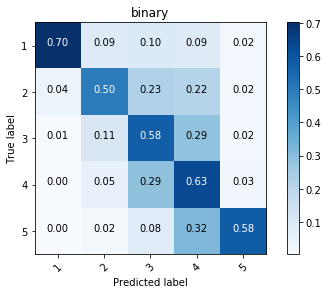

In [417]:
features = ['uid','pid']#,'time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = RandomForestRegressor()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'RF regressor')

## Random Forest Classifier

Train
	MSE(mean)        1.4924
	MSE(prediction)  0.1244
	R2(prediction)    0.9166
	confusion matrix
[[ 3729     8    17    22    83]	
 [   33  3333    19    30    82]	
 [   46    36  6187    63   184]	
 [   32    32   118 10996   306]	
 [   79    74   149   375 32418]]
Normalized confusion matrix
[[0.97 0.   0.   0.01 0.02]
 [0.01 0.95 0.01 0.01 0.02]
 [0.01 0.01 0.95 0.01 0.03]
 [0.   0.   0.01 0.96 0.03]
 [0.   0.   0.   0.01 0.98]]


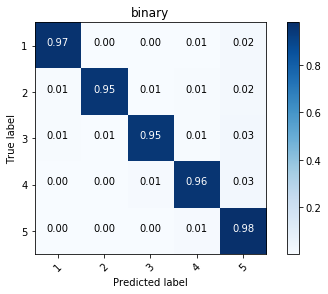


Test
	MSE(mean)        1.4543
	MSE(prediction)  2.0337
	R2(prediction)    -0.3984
	confusion matrix
[[  524   104   159   222   567]	
 [  149   158   202   316   607]	
 [  202   185   499   737  1181]	
 [  207   249   687  1420  2342]	
 [  517   591   966  2260 10000]]
Normalized confusion matrix
[[0.33 0.07 0.1  0.14 0.36]
 [0.1  0.11 0.14 0.22 0.42]
 [0.07 0.07 0.18 0.26 0.42]
 [0.04 0.05 0.14 0.29 0.48]
 [0.04 0.04 0.07 0.16 0.7 ]]


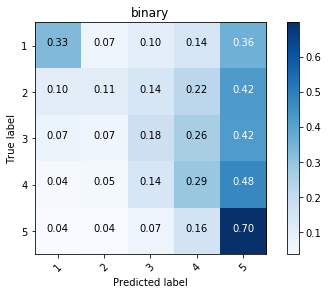

In [418]:
features = ['uid','pid']#,'time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = RandomForestClassifier()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'RF classifier')

### XGBClassifier

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train
	MSE(mean)        1.4924
	MSE(prediction)  2.0600
	R2(prediction)    -0.3803
	confusion matrix
[[  339     0     0   101  3419]	
 [   48    45     2   286  3116]	
 [    8     0    32   659  5817]	
 [   23     0     3  1130 10328]	
 [   24     0     0   678 32393]]
Normalized confusion matrix
[[8.78e-02 0.00e+00 0.00e+00 2.62e-02 8.86e-01]
 [1.37e-02 1.29e-02 5.72e-04 8.18e-02 8.91e-01]
 [1.23e-03 0.00e+00 4.91e-03 1.01e-01 8.93e-01]
 [2.00e-03 0.00e+00 2.61e-04 9.84e-02 8.99e-01]
 [7.25e-04 0.00e+00 0.00e+00 2.05e-02 9.79e-01]]


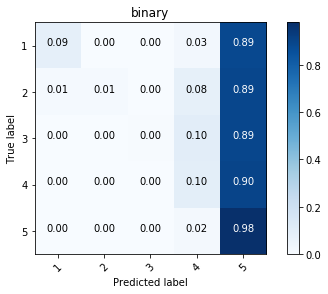


Test
	MSE(mean)        1.4543
	MSE(prediction)  1.9995
	R2(prediction)    -0.3749
	confusion matrix
[[  136     0     0    49  1391]	
 [   22    15     0   138  1257]	
 [    3     0    12   288  2501]	
 [   13     0     1   485  4406]	
 [   23     0     0   309 14002]]
Normalized confusion matrix
[[8.63e-02 0.00e+00 0.00e+00 3.11e-02 8.83e-01]
 [1.54e-02 1.05e-02 0.00e+00 9.64e-02 8.78e-01]
 [1.07e-03 0.00e+00 4.28e-03 1.03e-01 8.92e-01]
 [2.65e-03 0.00e+00 2.04e-04 9.89e-02 8.98e-01]
 [1.60e-03 0.00e+00 0.00e+00 2.16e-02 9.77e-01]]


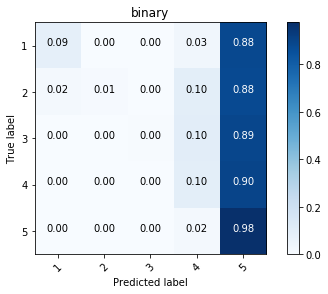

In [358]:
from xgboost import XGBClassifier
features = ['uid','pid','time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = XGBClassifier()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'XGBClassifier')

### XGBRegressor

Train
	MSE(mean)        1.4924
	MSE(prediction)  1.2371
	R2(prediction)    0.1711
	confusion matrix
[[   20   417  2071  1351     0]	
 [    0   140  1686  1671     0]	
 [    0    19  3229  3268     0]	
 [    0    23  4419  7042     0]	
 [    0    36  5799 27253     7]]
Normalized confusion matrix
[[5.18e-03 1.08e-01 5.37e-01 3.50e-01 0.00e+00]
 [0.00e+00 4.00e-02 4.82e-01 4.78e-01 0.00e+00]
 [0.00e+00 2.92e-03 4.96e-01 5.02e-01 0.00e+00]
 [0.00e+00 2.00e-03 3.85e-01 6.13e-01 0.00e+00]
 [0.00e+00 1.09e-03 1.75e-01 8.23e-01 2.12e-04]]


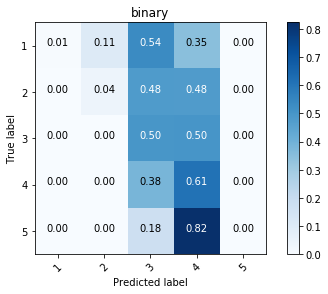


Test
	MSE(mean)        1.4543
	MSE(prediction)  1.2172
	R2(prediction)    0.1630
	confusion matrix
[[    5   176   822   573     0]	
 [    0    57   682   693     0]	
 [    0     6  1378  1420     0]	
 [    0    14  1949  2942     0]	
 [    0    30  2571 11730     3]]
Normalized confusion matrix
[[3.17e-03 1.12e-01 5.22e-01 3.64e-01 0.00e+00]
 [0.00e+00 3.98e-02 4.76e-01 4.84e-01 0.00e+00]
 [0.00e+00 2.14e-03 4.91e-01 5.06e-01 0.00e+00]
 [0.00e+00 2.85e-03 3.97e-01 6.00e-01 0.00e+00]
 [0.00e+00 2.09e-03 1.79e-01 8.18e-01 2.09e-04]]


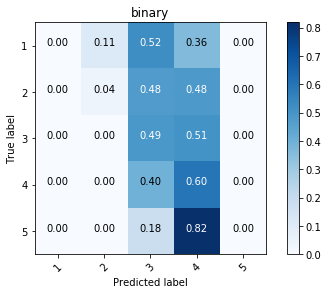

In [361]:
from xgboost import XGBRegressor
features = ['uid','pid','time','nuser','nproduct']
y_train = X_train['Score'].get_values()
y_test  = X_test['Score'].get_values()

model = XGBRegressor()
model.fit(X_train[features], X_train['Score'])


t_train = model.predict(X_train[features])
t_test  = model.predict(X_test[features])

print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'XGBRegressor')

## SVD

В нашей системе рекомендаций, у нас есть такая матрица, которая имеет много оценок от пользователей товарам. Мы надеемся предсказать оценку целевых пользователей для других неоцененных элементов, а затем порекомендовать товары с пятью самыми высокими показателями. Преимущество SVD заключается в том, что: матрица оценок пользователей является разреженной матрицей, поэтому мы можем отобразить исходные данные в низкоразмерном пространстве и затем вычислить сходство различных элементов. Это может помочь нам уменьшить сложность расчетов.
<img src="svd.png">

In [356]:
from numpy import *
from scipy.sparse.linalg import svds
from numpy import linalg as la
def svdrec(table = table, factors= 150):
    UI = matrix(table)
    user_ratings_mean = mean(UI,axis=0)
    user_ratings_mean = user_ratings_mean.reshape(1,-1)
    UI_demeaned = UI - user_ratings_mean
    U,sigma,Vt = svds(UI_demeaned,factors)
    sigma = diag(sigma)
    pred_mat = dot(dot(U,sigma),Vt) + user_ratings_mean
    sc = MinMaxScaler(feature_range = (1,5))
    pred_mat = sc.fit_transform(pred_mat)
    return pred_mat

In [387]:
M_train = create_table_from_dataframe(X_train)
M_test  = create_table_from_dataframe(X_test)

predict_table = svdrec(M_train)
t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(predict_table[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(predict_table[uid][pid])

Train
	MSE(mean)        1.4924
	MSE(prediction)  1.0698
	R2(prediction)    0.2831
	confusion matrix
[[ 2489  1271    58    41     0]	
 [  189  3045   220    34     9]	
 [  122  2603  3669    93    29]	
 [  142  1878  7091  2252   121]	
 [  321  2897 11104 17529  1244]]
Normalized confusion matrix
[[0.64 0.33 0.02 0.01 0.  ]
 [0.05 0.87 0.06 0.01 0.  ]
 [0.02 0.4  0.56 0.01 0.  ]
 [0.01 0.16 0.62 0.2  0.01]
 [0.01 0.09 0.34 0.53 0.04]]


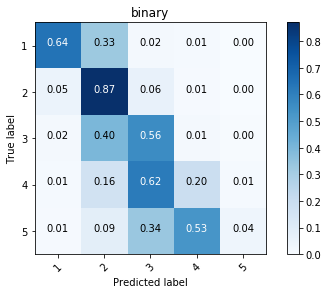


Test
	MSE(mean)        1.4543
	MSE(prediction)  3.5719
	R2(prediction)    -1.4561
	confusion matrix
[[   0    0    0    0    0    0]	
 [   0 1342  214   10   10    0]	
 [   0  596  809   16   10    1]	
 [   0 1099 1495  201    9    0]	
 [   0 1584 1959 1307   49    6]	
 [   4 3147 3319 5541 2288   35]]
Normalized confusion matrix
[[     nan      nan      nan      nan      nan      nan]
 [0.00e+00 8.52e-01 1.36e-01 6.35e-03 6.35e-03 0.00e+00]
 [0.00e+00 4.16e-01 5.65e-01 1.12e-02 6.98e-03 6.98e-04]
 [0.00e+00 3.92e-01 5.33e-01 7.17e-02 3.21e-03 0.00e+00]
 [0.00e+00 3.23e-01 3.99e-01 2.66e-01 9.99e-03 1.22e-03]
 [2.79e-04 2.20e-01 2.32e-01 3.87e-01 1.60e-01 2.44e-03]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


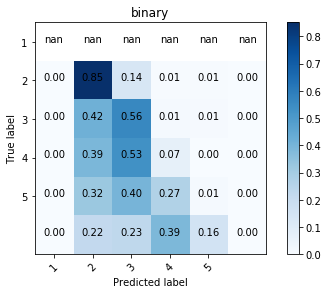

In [388]:
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'SVD')

In [392]:
# X

In [393]:
M_train = create_table_from_dataframe(data)
# M_test  = create_table_from_dataframe(X_test)

predict_table = svdrec(M_train)
t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(predict_table[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(predict_table[uid][pid])

Train
	MSE(mean)        1.4924
	MSE(prediction)  0.4786
	R2(prediction)    0.6793
	confusion matrix
[[ 3267   531    59     2     0]	
 [   82  3174   222    19     0]	
 [   84  1022  5306    88    16]	
 [  104  1057  3215  7044    64]	
 [  194  1490  2171 27859  1381]]
Normalized confusion matrix
[[8.47e-01 1.38e-01 1.53e-02 5.18e-04 0.00e+00]
 [2.34e-02 9.08e-01 6.35e-02 5.43e-03 0.00e+00]
 [1.29e-02 1.57e-01 8.14e-01 1.35e-02 2.46e-03]
 [9.06e-03 9.20e-02 2.80e-01 6.13e-01 5.57e-03]
 [5.86e-03 4.50e-02 6.56e-02 8.42e-01 4.17e-02]]


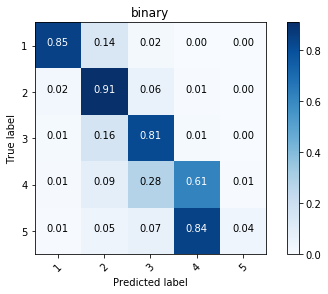


Test
	MSE(mean)        1.4543
	MSE(prediction)  0.4695
	R2(prediction)    0.6771
	confusion matrix
[[ 1335   227    14     0     0]	
 [   31  1299    91    10     1]	
 [   24   445  2299    30     6]	
 [   43   425  1349  3046    42]	
 [   88   640   935 12079   592]]
Normalized confusion matrix
[[8.47e-01 1.44e-01 8.88e-03 0.00e+00 0.00e+00]
 [2.16e-02 9.07e-01 6.35e-02 6.98e-03 6.98e-04]
 [8.56e-03 1.59e-01 8.20e-01 1.07e-02 2.14e-03]
 [8.77e-03 8.66e-02 2.75e-01 6.21e-01 8.56e-03]
 [6.14e-03 4.46e-02 6.52e-02 8.43e-01 4.13e-02]]


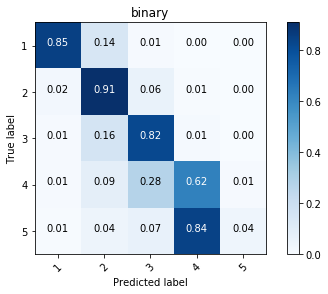

In [394]:
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'SVD (full, not correct)')

## Matrix factorization

Latent factor models are an alternative approach that tries to explain the ratings by characterizing both items and users on, say, 20 to 100 factors inferred from the ratings patterns. For products, the discovered factors might measure obvious dimensions such as candy vs drinks, or adult food vs children’s; For users, each factor measures how much the user likes the product that score high on the corresponding movie factor. Using latent factor model, we transform the way to calculate the similarity of users and products. The features become more stable and condense.

we first create two new metrics, user-latent_factor and product-latent_factor. The size are qf and pf, p, q are the total number of users and products, f is the number of latent factors. So, every element in the target matrix can be calculate as: And the target matrix is shown as . Next, we need to create the objective function based on least-square method to minimize the loss
<img src="matrix_factorization.png">

The system adjusts the model by fitting the previously observed ratings. However, the goal is to generalize those previous ratings in a way that predicts the unknown ratings. Thus, the system should avoid overfitting the observed data by regularizing the learned parameters by adding L2 term. The constant λ controls the extent of regularization and is usually determined by cross-validation. Next, we use stochastic gradient descent to optimize the objective function. The processing is:

<img src="46ftTCS.png">

Where gamma is the stochastic learning rate and e is the error term. In the iteration, when the change in loss is larger than 0, the learning rate increases by 5%; if delta-loss is smaller than 0, it means the new loss is becoming larger. The learning rate decreases by 50% so that the loss can converge.

In [408]:
def MF (data, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3):
    # latent matrix for user
    U = np.random.rand(total_u, factors) / 3
    # latent matrix for item
    I = np.random.rand(total_p, factors) / 3
    # initial y as the history of loss
    y = []
    # initial the iteration and last loss
    iteration = 0
    last_loss = 0
    while iteration < maxIter:
        loss = 0
        for i in range(data.shape[0]):
            # get the uid, pid and the score from every line
            u, p, s = data[i]
            # calculate the error
            error = s - np.dot(U[u], I[p])
            # calculate the loss function
            # avoid loss become to large, scale to 1/50
            loss += error ** 2 / 50
            # update the parameter according to the gradient descent
            pp = U[u]
            qq = I[p]
            U[u] += LRate * error * qq
            I[p] += LRate * error * pp
        iteration += 1
        y.append(loss)
        delta_loss = last_loss - loss
        print('iter = {}, loss = {}, delta_loss = {}, LR = {}'.format(iteration, loss, delta_loss, LRate))
        # update the learn rate to make sure it will converge
        if abs(last_loss) > abs(loss):
            LRate *= 1.05
        else:
            LRate *= 0.5
        # When converge, stop the gradient descend
        if abs(delta_loss) < abs(GD_end):
            print('the diff in loss is {}, so the GD stops'.format(delta_loss))
            break
        last_loss = loss
    return U.dot(I.T)

In [409]:
data_simple_format = X_train[['uid', 'pid', 'Score']].get_values()
result = MF(data_simple_format, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3)

iter = 1, loss = 4126.431112685157, delta_loss = -4126.431112685157, LR = 0.02
iter = 2, loss = 1235.349509060637, delta_loss = 2891.08160362452, LR = 0.01
iter = 3, loss = 734.735159772696, delta_loss = 500.6143492879411, LR = 0.0105
iter = 4, loss = 598.8375246898289, delta_loss = 135.89763508286705, LR = 0.011025000000000002
iter = 5, loss = 526.8288817011984, delta_loss = 72.00864298863053, LR = 0.011576250000000003
iter = 6, loss = 479.43583052340864, delta_loss = 47.393051177789744, LR = 0.012155062500000004
iter = 7, loss = 441.10099448597566, delta_loss = 38.33483603743298, LR = 0.012762815625000005
iter = 8, loss = 404.73011842944015, delta_loss = 36.37087605653551, LR = 0.013400956406250006
iter = 9, loss = 367.20325903108125, delta_loss = 37.52685939835891, LR = 0.014071004226562506
iter = 10, loss = 328.0283679016684, delta_loss = 39.174891129412856, LR = 0.014774554437890632
iter = 11, loss = 288.45074133487145, delta_loss = 39.57762656679694, LR = 0.015513282159785164
ite

Train
	MSE(mean)        1.4924
	MSE(prediction)  0.0003
	R2(prediction)    0.9998
	confusion matrix
[[    0     0     0     0     0     0]	
 [ 1994  1865     0     0     0     0]	
 [    0  1785  1712     0     0     0]	
 [    0     0  3189  3327     0     0]	
 [    0     0     0  5633  5851     0]	
 [    0     0     0     0 16530 16565]]
Normalized confusion matrix
[[ nan  nan  nan  nan  nan  nan]
 [0.52 0.48 0.   0.   0.   0.  ]
 [0.   0.51 0.49 0.   0.   0.  ]
 [0.   0.   0.49 0.51 0.   0.  ]
 [0.   0.   0.   0.49 0.51 0.  ]
 [0.   0.   0.   0.   0.5  0.5 ]]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


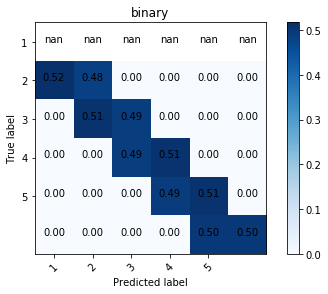


Test
	MSE(mean)        1.4543
	MSE(prediction)  0.3472
	R2(prediction)    0.7613
	confusion matrix
[[   0    0    0    0    0    0    0    0]	
 [ 556  782   91   97   42    7    1    0]	
 [   5  426  673  203  102   20    2    1]	
 [   7   42  987 1451  265   50    1    1]	
 [   7   37  245 2368 2165   78    5    0]	
 [   2   14  186  680 8610 4827   13    2]	
 [   0    0    0    0    0    0    0    0]	
 [   0    0    0    0    0    0    0    0]]
Normalized confusion matrix
[[     nan      nan      nan      nan      nan      nan      nan      nan]
 [3.53e-01 4.96e-01 5.77e-02 6.15e-02 2.66e-02 4.44e-03 6.35e-04 0.00e+00]
 [3.49e-03 2.97e-01 4.70e-01 1.42e-01 7.12e-02 1.40e-02 1.40e-03 6.98e-04]
 [2.50e-03 1.50e-02 3.52e-01 5.17e-01 9.45e-02 1.78e-02 3.57e-04 3.57e-04]
 [1.43e-03 7.54e-03 4.99e-02 4.83e-01 4.41e-01 1.59e-02 1.02e-03 0.00e+00]
 [1.40e-04 9.77e-04 1.30e-02 4.74e-02 6.01e-01 3.37e-01 9.07e-04 1.40e-04]
 [     nan      nan      nan      nan      nan      nan      nan      

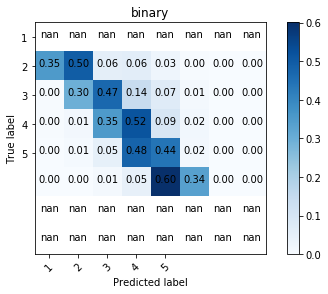

In [410]:
t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(result[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(result[uid][pid])
    
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'Matrix factorization')

## Probabilistic Matrix Factorization

<img src="1.png">
PMF похож на MF. Это не что иное, как MF, предполагая, что распределение пользователя и товара являются нормальными. То есть:
<img src="2.png">
И совместное распределение пользователя и продукта является распределением рейтингов:
<img src="3.png">
Проблема сводится к максимальной вероятности U, V на основе R и дисперсии. Это преобразование основано на формуле Байеса. Перепишем вышеописанную функцию и логарифмируем обе стороны
<img src="4.png">
При оптимизации этой функции стандартные ошибки фиксированы, поэтому целевой функцией является:
<img src="5.png">
**Процесс градиентного спуска такой же, как и у основного MF. PMF работает лучше, чем MF для разреженных матриц в силe нормального распределения. Но для нашего датасета выбранные данные не редки, поэтому производительность PMF почти одинакова с MF.**

**Gradient descent process is the same with basic MF. PMF does better than MF for sparse matrices. The assumption of Gaussian makes it more accurate to predict. But for our dataset, the chosen data is not sparse, so the performance of PMF is almost the same with MF.**

In [412]:
def PMF(data, factors=30, maxIter=100, 
        LRate=0.02, GD_end=1e-3, regU = 0.01, 
        regI = 0.01 ,plot=False):
    
    U = np.random.rand(total_u, factors) / 3
    I = np.random.rand(total_p, factors) / 3
    y = []
    iteration = 0
    last_loss = 100
    while iteration < maxIter:
        loss = 0
        for i in range(data.shape[0]):
            u, p, s = data[i]
            error = s - np.dot(U[u], I[p])
            loss += error ** 2/50
            pp = U[u]
            qq = I[p]
            U[u] += LRate *  (error * qq - regU * pp)
            I[p] += LRate * (error * pp - regI * qq)
        loss += regU * (U * U).sum() + regI * (I * I).sum()
        iteration += 1
        y.append(loss)
        delta_loss = last_loss - loss
        print('iter = {}, loss = {}, delta_loss = {}, LR = {}'.format(iteration, loss, delta_loss, LRate))
        if abs(last_loss) > abs(loss):
            LRate *= 1.05
        else:
            LRate *= 0.5

        if abs(delta_loss) < abs(GD_end):
            print('the diff in loss is {}, so the GD stops'.format(delta_loss))
            break
        last_loss = loss
    return U.dot(I.T)

iter = 1, loss = 4393.4013597729445, delta_loss = -4293.4013597729445, LR = 0.02
iter = 2, loss = 1451.387591380947, delta_loss = 2942.0137683919975, LR = 0.01
iter = 3, loss = 970.6325539064075, delta_loss = 480.75503747453956, LR = 0.0105
iter = 4, loss = 841.385242436432, delta_loss = 129.24731146997544, LR = 0.011025000000000002
iter = 5, loss = 774.9786235299858, delta_loss = 66.40661890644617, LR = 0.011576250000000003
iter = 6, loss = 732.9148837151793, delta_loss = 42.06373981480658, LR = 0.012155062500000004
iter = 7, loss = 700.0076068409406, delta_loss = 32.90727687423862, LR = 0.012762815625000005
iter = 8, loss = 669.437070632691, delta_loss = 30.570536208249678, LR = 0.013400956406250006
iter = 9, loss = 638.1931092203052, delta_loss = 31.243961412385715, LR = 0.014071004226562506
iter = 10, loss = 605.5854275985632, delta_loss = 32.60768162174202, LR = 0.014774554437890632
iter = 11, loss = 572.3506220094041, delta_loss = 33.23480558915912, LR = 0.015513282159785164
iter

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


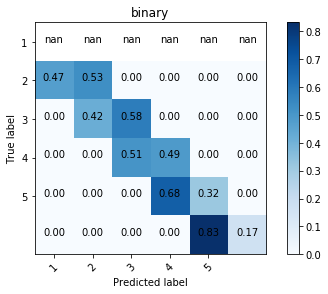


Test
	MSE(mean)        1.4543
	MSE(prediction)  0.3203
	R2(prediction)    0.7797
	confusion matrix
[[    0     0     0     0     0     0     0]	
 [  563   770   105   104    33     1     0]	
 [    3   416   675   227   102     8     1]	
 [    3    31  1143  1357   245    25     0]	
 [    4    34   250  3106  1442    68     1]	
 [    2    18   156   740 11801  1615     2]	
 [    0     0     0     0     0     0     0]]
Normalized confusion matrix
[[     nan      nan      nan      nan      nan      nan      nan]
 [3.57e-01 4.89e-01 6.66e-02 6.60e-02 2.09e-02 6.35e-04 0.00e+00]
 [2.09e-03 2.91e-01 4.71e-01 1.59e-01 7.12e-02 5.59e-03 6.98e-04]
 [1.07e-03 1.11e-02 4.08e-01 4.84e-01 8.74e-02 8.92e-03 0.00e+00]
 [8.15e-04 6.93e-03 5.10e-02 6.33e-01 2.94e-01 1.39e-02 2.04e-04]
 [1.40e-04 1.26e-03 1.09e-02 5.16e-02 8.23e-01 1.13e-01 1.40e-04]
 [     nan      nan      nan      nan      nan      nan      nan]]


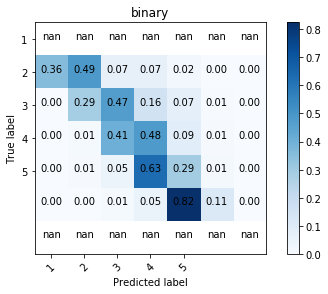

In [413]:
data_simple_format = X_train[['uid', 'pid', 'Score']].get_values()

result = PMF(data_simple_format, factors=30, maxIter=100, LRate=0.02, GD_end=1e-3, plot=True)

t_test, t_train = [], []

for pid, uid in data[data['OOS'] == False][['pid', 'uid']].get_values():
    t_train.append(result[uid][pid])
for pid, uid in data[data['OOS'] == True][['pid', 'uid']].get_values():
    t_test.append(result[uid][pid])
    
print_all_metric(y_train, t_train, y_test, t_test, binary = False, name = 'PMF')

In [ ]:
# Таблица с результатами
Указать MSE(median) (train/test)

(Название метода | R2 (test) | R2 (train) | Conf Matrix (test) | macro-f1 (test) )


In [427]:
res = pd.DataFrame(results_final).T.sort_values('r2(test)')[::-1]#.ipynb_checkpoints/
res

,r2(test),r2(train)
PMF,0.779740,0.998403
Matrix factorization,0.761280,0.999832
"SVD (full, not correct)",0.677130,0.679329
RF regressor,0.558795,0.924974
XGBRegressor,0.163029,0.171075
XGBClassifier,-0.374902,-0.380328
RF classifier,-0.398399,0.916637
SVD,-1.456113,0.283146


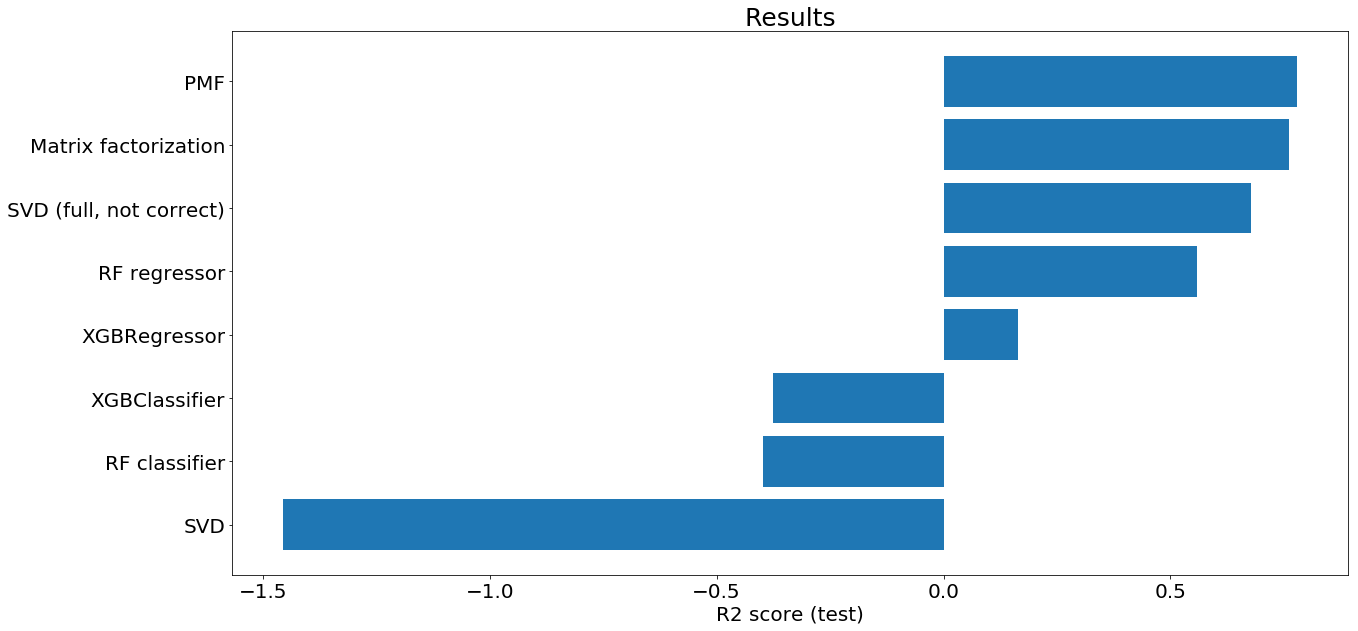

In [445]:
# plt.boxplot(df)
# pd.DataFrame(results_final).T.sort_values('r2(test)')[::-1]#.ipynb_checkpoints/
plt.figure(figsize = (20, 10))
plt.title('Results', fontsize = 25)
plt.barh(range(len(res)), res['r2(test)'].get_values()[::-1])
plt.yticks(range(len(res)), res.index[::-1], fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('R2 score (test)', fontsize = 20)
plt.show()